
Лабораторная работа 4.1
Вариант 2:

y(0) = 1
y'(0) = 0
x = [0, 1]
h = 0.1
Точное решение: x*sin(x)+cos(x)
Задача Коши: y'' + y - 2*cos(x) = 0

Текущий шаг: 0.1

Метод Эйлера:
x = 0.0, y = 1
x = 0.1, y = 1.01
x = 0.2, y = 1.0298000833055605
x = 0.3, y = 1.0589034973348903
x = 0.4, y = 1.0965246061733833
x = 0.5, y = 1.1416016888302
x = 0.6, y = 1.1928144058365224
x = 0.7, y = 1.248605691082673
x = 0.8, y = 1.3072077631636867
x = 0.9, y = 1.3666718918000067
x = 1.0, y = 1.42490150088374


Метод Рунге-Кутта:
x = 0.0, y = 1
x = 0.1, y = 1.0049875017359664
x = 0.2, y = 1.0198004024992113
x = 0.3, y = 1.0439924431189946
x = 0.4, y = 1.076828128023344
x = 0.5, y = 1.1172950077157338
x = 0.6, y = 1.164120632787752
x = 0.7, y = 1.215793941746397
x = 0.8, y = 1.2705907822889453
x = 0.9, y = 1.326603206879753
x = 1.0, y = 1.3817721293338139


Метод Адамса:
x = 0.0, y = 1
x = 0.1, y = 1.0049875017359664
x = 0.2, y = 1.0198004024992113
x = 0.3, y = 1.0439924431189946
x = 0.4, y = 1.076824857465474

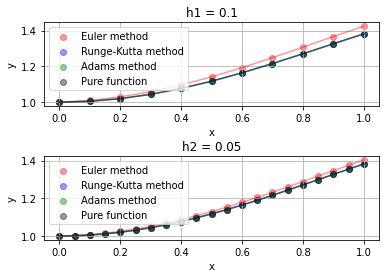

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt


target = '''
y(0) = 1
y'(0) = 0
x = [0, 1]
h = 0.1
Точное решение: x*sin(x)+cos(x)
Задача Коши: y'' + y - 2*cos(x) = 0
'''

def cauchyProblem(x, y, y_der):
    return 2*math.cos(x)-y

def pureFunction(x):
    return x*math.sin(x)+math.cos(x)

def g(x, y, k):
    return k

def sse(f, y):
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

def analytical(f, a, b, h):
    x = [i for i in np.arange(a, b + h, h)]
    y = [f(i) for i in x]
    return x, y

def euler(f, a, b, h, y0, y_der):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = y_der
    for i in range(n):
        k += h * f(x[i], y[i], k)
        y.append(y[i] + h * g(x[i], y[i], k))

    return x, y

def rungeKutt(f, a, b, h, y0, y_der):
    n = int((b - a) / h)
    x = [i for i in np.arange(a, b + h, h)]
    y = [y0]
    k = [y_der]
    for i in range(n):
        K1 = h * g(x[i], y[i], k[i])
        L1 = h * f(x[i], y[i], k[i])
        K2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, k[i] + 0.5 * L1)
        L2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, k[i] + 0.5 * L1)
        K3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, k[i] + 0.5 * L2)
        L3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, k[i] + 0.5 * L2)
        K4 = h * g(x[i] + h, y[i] + K3, k[i] + L3)
        L4 = h * f(x[i] + h, y[i] + K3, k[i] + L3)
        y.append(y[i] + (K1 + 2 * K2 + 2 * K3 + K4) / 6)
        k.append(k[i] + (L1 + 2 * L2 + 2 * L3 + L4) / 6)
    return x, y, k

def adams(f, x, y, k, h):
    n = len(x)
    x = x[:4]
    y = y[:4]
    k = k[:4]
    for i in range(3, n - 1):
        k.append(k[i] + h * (55 * f(x[i], y[i], k[i]) -
                             59 * f(x[i - 1], y[i - 1], k[i - 1]) +
                             37 * f(x[i - 2], y[i - 2], k[i - 2]) -
                              9 * f(x[i - 3], y[i - 3], k[i - 3])) / 24)

        y.append(y[i] + h * (55 * g(x[i], y[i], k[i]) -
                             59 * g(x[i - 1], y[i - 1], k[i - 1]) +
                             37 * g(x[i - 2], y[i - 2], k[i - 2]) -
                              9 * g(x[i - 3], y[i - 3], k[i - 3])) / 24)
        x.append(x[i] + h)
    return x, y

def rungeRomberg(dict_):
    k = dict_[0]['h'] / dict_[1]['h']
    Y1 = [yi for xi, yi in zip(dict_[0]['Euler']['x'], dict_[0]['Euler']['y']) if xi in dict_[1]['Euler']['x']]
    Y2 = [yi for xi, yi in zip(dict_[1]['Euler']['x'], dict_[1]['Euler']['y']) if xi in dict_[0]['Euler']['x']]
    euler = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in dict_[0]['Euler']['x'] if xi in dict_[1]['Euler']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(euler)):
        euler[i] = abs(euler[i] - Y_ex[i])

    Y1 = [yi for xi, yi in zip(dict_[0]['Runge']['x'], dict_[0]['Runge']['y']) if xi in dict_[1]['Runge']['x']]
    Y2 = [yi for xi, yi in zip(dict_[1]['Runge']['x'], dict_[1]['Runge']['y']) if xi in dict_[0]['Runge']['x']]
    runge = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in dict_[0]['Runge']['x'] if xi in dict_[1]['Runge']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(runge)):
        runge[i] = abs(runge[i] - Y_ex[i])

    Y1 = [yi for xi, yi in zip(dict_[0]['Adams']['x'], dict_[0]['Adams']['y']) if xi in dict_[1]['Adams']['x']]
    Y2 = [yi for xi, yi in zip(dict_[1]['Adams']['x'], dict_[1]['Adams']['y']) if xi in dict_[0]['Adams']['x']]
    adams = [y1 + (y2 - y1) / (k ** 2 - 1) for y1, y2 in zip(Y1, Y2)]
    X_ex = [xi for xi in dict_[0]['Adams']['x'] if xi in dict_[1]['Adams']['x']]
    Y_ex = [pureFunction(i) for i in X_ex]
    for i in range(len(adams)):
        adams[i] = abs(adams[i] - Y_ex[i])

    return {'Euler': euler, 'Runge': runge, 'Adams': adams}

def show(res, pure, h):
    n = len(res)
    for i in range(n):
        plt.subplot(n, 1, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.6)
        plt.scatter(res[i]["Euler"]["x"], res[i]["Euler"]["y"], color='r', alpha=0.4, label='Euler method')
        plt.plot(res[i]["Euler"]["x"], res[i]["Euler"]["y"], color='r', alpha=0.4)
        plt.scatter(res[i]["Runge"]["x"], res[i]["Runge"]["y"], color='b', alpha=0.4, label='Runge-Kutta method')
        plt.plot(res[i]["Runge"]["x"], res[i]["Runge"]["y"], color='b', alpha=0.4)
        plt.scatter(res[i]["Adams"]["x"], res[i]["Adams"]["y"], color='g', alpha=0.4, label='Adams method')
        plt.plot(res[i]["Adams"]["x"], res[i]["Adams"]["y"], color='g', alpha=0.4)
        plt.scatter(pure[i][0], pure[i][1], color='k', alpha=0.4, label='Pure function')
        plt.plot(pure[i][0], pure[i][1], color='k', alpha=0.4)

        plt.legend(loc='best')
        plt.title('h{0} = '.format(i + 1) + str(h[i]))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid(True)
    plt.savefig('Methods.png')
    plt.show()

if __name__ == '__main__':
    print('\nЛабораторная работа 4.1\nВариант 2:')
    a = 0
    b = 1
    h = 0.1
    y0 = 1
    y_der = 0
    print(target)
    res = []
    pure = []
    steps = [h, h/2]
    for h in steps:
        print(f"Текущий шаг: {h}")
        print("\nМетод Эйлера:")
        x_eul, y_eul = euler(cauchyProblem, a, b, h, y0, y_der)
        for x, y in zip(x_eul, y_eul):
            print(f'x = {round(x, 4)}, y = {y}')
        print()

        print("\nМетод Рунге-Кутта:")
        x_rung, y_rung, k_rung = rungeKutt(cauchyProblem, a, b, h, y0, y_der)
        for x, y in zip(x_rung, y_rung):
            print(f'x = {round(x, 4)}, y = {y}')
        print()

        print("\nМетод Адамса:")
        x_ad, y_ad = adams(cauchyProblem, x_rung, y_rung, k_rung, h)
        for x, y in zip(x_ad, y_ad):
            print(f'x = {round(x, 4)}, y = {y}')
        print()

        print("\nАналитический метод:")
        x_anal, y_anal = analytical(pureFunction, a, b, h)
        for x, y in zip(x_anal, y_anal):
            print(f'x = {round(x, 4)}, y = {y}')
        print()

        pure.append((x_anal, y_anal))
        res.append({
                    "h": h,
                    "Euler": {'x': x_eul, 'y': y_eul},
                    "Runge": {'x': x_rung, 'y': y_rung},
                    "Adams": {'x': x_ad, 'y': y_ad},
                    })

    err = rungeRomberg(res)
    print("Погрешность метода Эйлера: {0}".format(err['Euler']))
    print("Погрешность метода Рунге-Кутты: {0}".format(err['Runge']))
    print("Погрешность метода Адамса: {0}".format(err['Adams']))

    show(res, pure, steps)